<a href="https://colab.research.google.com/github/ayush-thakur02/LCM-LoRA/blob/main/LCM_LoRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="justify" markdown=1>

# LCM LoRA Colab Notebook || Github - @ayush-thakur02

This Python Notebook is designed for running the LCM LoRA models on Google Colab with a T4 GPU. These open-source models are entirely free for you to use as much as you'd like, enabling you to synthesize high-resolution images with few-step inference. LCM LoRA models include <b>SD v1.5, SDXL, and SSD 1B</b>, which are based on stable diffusion models with LoRA distillation. Don't forget to share this resource with your friends, and happy synthesizing! 😃

---

### Make Sure to follow me:

[![Github](https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white)](https://github.com/ayush-thakur02/LCM-LoRA)
[![BioLink](https://img.shields.io/badge/bio.link-000000%7D?style=for-the-badge&logo=biolink&logoColor=white)](https://bio.link/ayush_thakur02)

</div>

In [ ]:
%pip install --quiet --upgrade diffusers accelerate

In [ ]:
# @title Select your Favourite Model
SD_Models = "stabilityai/stable-diffusion-xl-base-1.0" # @param ["stabilityai/stable-diffusion-xl-base-1.0", "runwayml/stable-diffusion-v1-5","segmind/SSD-1B"]
LoRA_Models = "latent-consistency/lcm-lora-sdxl" # @param ["latent-consistency/lcm-lora-sdxl","latent-consistency/lcm-lora-sdv1-5","latent-consistency/lcm-lora-ssd-1b"]

from diffusers import DiffusionPipeline, LCMScheduler
import torch
import time

pipe = DiffusionPipeline.from_pretrained(
    SD_Models,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
    )

pipe.load_lora_weights(LoRA_Models)
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)

pipe = pipe.to("cuda", dtype=torch.float16)

  0%|          | 0/4 [00:00<?, ?it/s]

Total time taken for Generating Image: 4.0421271324157715 seconds



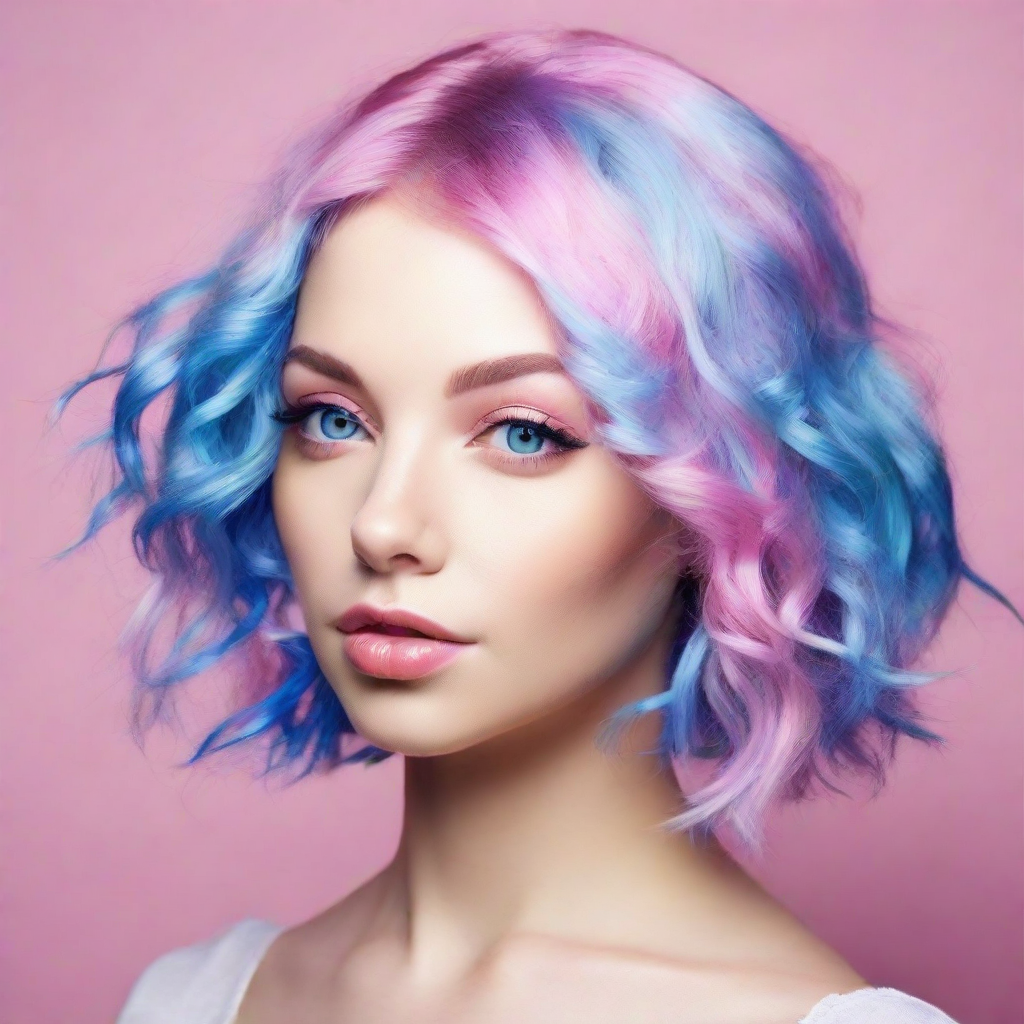

In [ ]:
# @title Enter your Prompt and Run
Prompt = "close protrait of a beautiful girl, blue, pink hair style" # @param {type:"string"}
No_of_Steps = 4 # @param {type:"integer"}
Guidance_Scale = 1 # @param {type:"number"}

start_time = time.time()
images = pipe(
    prompt=Prompt,
    num_inference_steps=No_of_Steps,
    guidance_scale=Guidance_Scale,
).images[0]
end_time = time.time()

total_time = end_time - start_time
print(f"Total time taken for Generating Image: {total_time} seconds\n")
images

<div align="justify" markdown=1>

# Support me

Hey Guys, I am a student who is passionate about AI and it's generative models. I created this notebook to share my work and help others learn and experiment with the LCM LoRA models. If you find this notebook useful or interesting, please consider supporting me in any of the following ways:

 - Star this repository on GitHub and share it with your friends and colleagues.
 - Follow me on GitHub and Twitter for more updates and projects.
 - Buy me a coffee

[!["Buy Me A Coffee"](https://www.buymeacoffee.com/assets/img/custom_images/orange_img.png)](https://www.buymeacoffee.com/ayushthakur)
[![Github](https://img.shields.io/badge/GitHub_Repository-100000?style=for-the-badge&logo=github&logoColor=white)](https://github.com/ayush-thakur02/LCM-LoRA)

Thank you for your support and feedback! 😊

</div>